In [ ]:
pip install yfinance pydataset

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.9/15.9 MB 40.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pydataset: filename=pydataset-0.2.0-py3-none-any.whl size=15939432 sha256=7b84764af3a50d296a0cb70f6b2b379758d77136b12827284651baff0ad6b7d9
  Stored in directory: /root/.cache/pip/wheels/d7/e5/36/85d319586b4a405d001029d489102f526ce5546248c295932a
Successfully built pydataset


In [ ]:
import yfinance as yf
from pydataset import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (20,10)

In [ ]:
def get_yfinance(id_name):
  df = yf.Ticker(id_name)
  return  df.history(period="max")

In [ ]:
df_itausa = get_yfinance('ITSA4.SA')

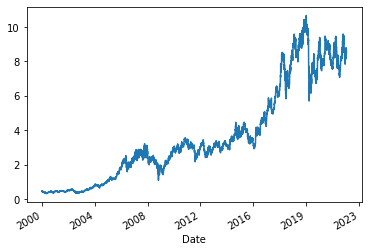

In [ ]:
df['Close'].plot()

In [ ]:
timeseries_titles = ['AirPassengers', 'nottem', 'ambientNOxCH', 'acme', 'sunspot.year', 'UKDriverDeaths', 
                    'USAccDeaths', 'UKgas', 'JohnsonJohnson', 'Nile', 'LakeHuron', 'austres', 
                    'lynx', 'deaths', 'drivers']
                    
df_air = data('AirPassengers')

In [ ]:
len(timeseries_titles)

15

In [ ]:

data('AirPassengers', show_doc=True )

AirPassengers

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Monthly Airline Passenger Numbers 1949-1960

### Description

The classic Box & Jenkins airline data. Monthly totals of international
airline passengers, 1949 to 1960.

### Usage

    AirPassengers

### Format

A monthly time series, in thousands.

### Source

Box, G. E. P., Jenkins, G. M. and Reinsel, G. C. (1976) _Time Series Analysis,
Forecasting and Control._ Third Edition. Holden-Day. Series G.

### Examples

    ## Not run: 
    ## These are quite slow and so not run by example(AirPassengers)
    ## The classic 'airline model', by full ML
    (fit <- arima(log10(AirPassengers), c(0, 1, 1),
                  seasonal = list(order = c(0, 1, 1), period = 12)))
    update(fit, method = "CSS")
    update(fit, x = window(log10(AirPassengers), start = 1954))
    pred <- predict(fit, n.ahead = 24)
    tl <- pred$pred - 1.96 * pred$se
    tu <- pred$pred + 1.96 * pred$se
    ts.plot(

In [ ]:
df_air['date'] = pd.date_range(start = '1949-01-01', end='1961-01-01', freq='M' )

In [ ]:
df_air.set_index('date', inplace=True)

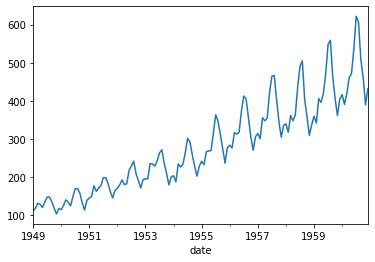

In [ ]:
df_air['AirPassengers'].plot()

In [ ]:
example_ma = [1,2,3,4,5,6,7,8,9,10]
ma_size=2

for i in range(ma_size, len(example_ma)):
  consider_val = example_ma[i-ma_size:i]
  print(f'valores considerados: {consider_val}, MA {np.mean(consider_val)}, valor atual {i}')

valores considerados: [1, 2], MA 1.5, valor atual 2
valores considerados: [2, 3], MA 2.5, valor atual 3
valores considerados: [3, 4], MA 3.5, valor atual 4
valores considerados: [4, 5], MA 4.5, valor atual 5
valores considerados: [5, 6], MA 5.5, valor atual 6
valores considerados: [6, 7], MA 6.5, valor atual 7
valores considerados: [7, 8], MA 7.5, valor atual 8
valores considerados: [8, 9], MA 8.5, valor atual 9


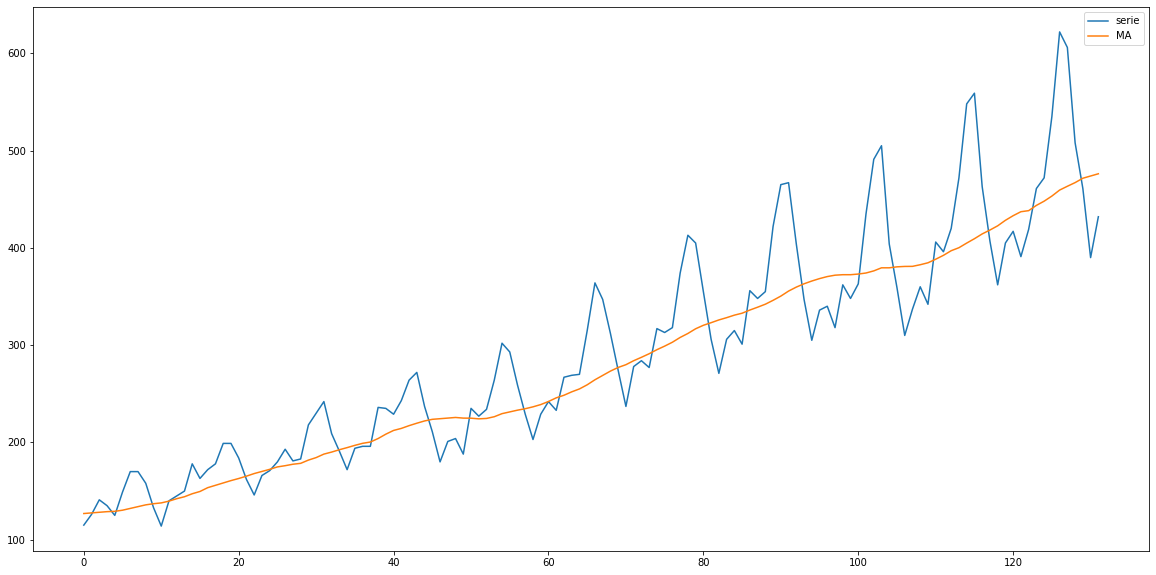

In [ ]:
def show_trend(ts, ma_size):
  to_show = pd.DataFrame()

  to_show['serie'] = ts.values[ma_size:]
  to_show['MA']  = ts.rolling(ma_size).mean().values[ma_size:]
  to_show.plot()
  plt.show()

ts = df_air['AirPassengers']
ma_size=12
show_trend(ts, ma_size)

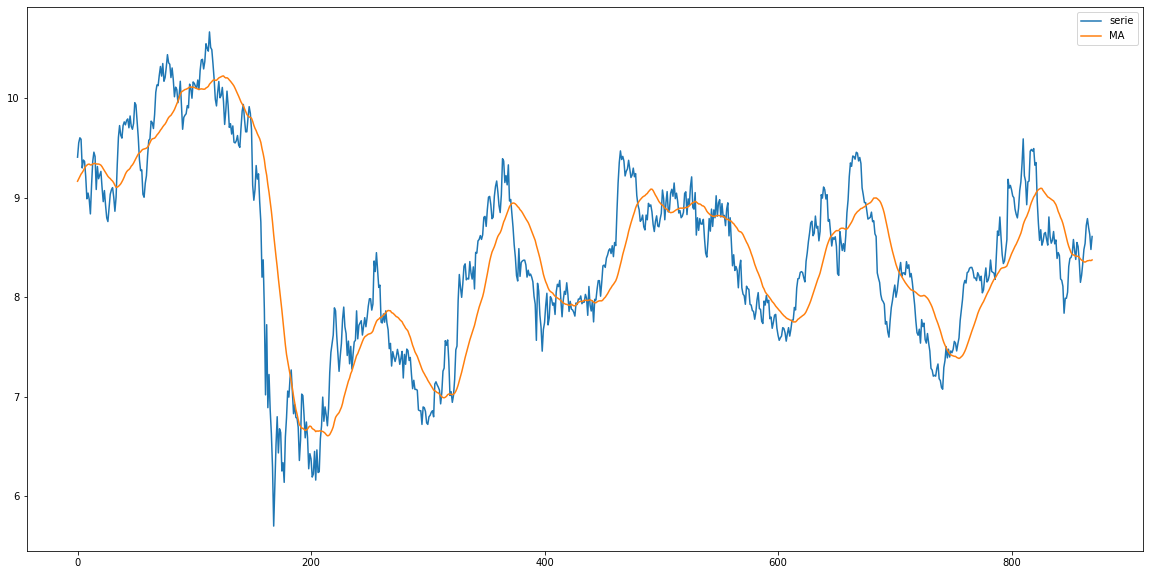

In [ ]:
ts = df['Close'].iloc[-900:]
ma_size=30
show_trend(ts, ma_size)

In [ ]:
 - selecionar 2 séries: uma financeira e uma adicional ()